## Objetivo

[PT-BR] A saúde física trás benefícios significativos para melhor qualidade de vida, porém, em um mundo cada vez mais conectado e com facilidade no consumo de alimentos com alto teor de gordura e açúcar, as pessoas tendem a não praticar atividade física e terem má alimentação com a vida cotidiana agitada. Assim, uma ferramenta capaz de estimar a quantidade de gordura corporal e músculos permite que, sem sair de casa, seja possível obter informações que estimulem a procura de um profissional da área de nutrição e criar hábitos mais saudáveis. Este trabalho propôs com duas imagens de uma pessoa, de frente e lado, detectar o corpo humano, identificar pontos de interesse (pescoço, cintura e quadril) para informar a quantidade de pixels e medir a circunferência em centímetros de cada parte do corpo com a aplicação de três modelos de inteligência artificial. Também foi proposto com as medidas da circunferência das três partes do corpo, realizar cálculos que indiquem uma avaliação física da pessoa. Os modelos pré-treinados utilizados foram YOLOv8, MediaPipe e Detectron2. Os resultados indicam uma variação de centímetros em relação a medida real e a dos modelos que, aplicadas aos cálculos, existem diferenças esperadas nos resultados, porém, testes com o ângulo das imagens se fazem necessários, além de mais imagens de pessoas diferentes, para aumentar a precisão e obter os valores mais próximos possíveis das medições reais.

<br>

[EN-US] Physical health brings significant benefits for a better quality of life, however, in an increasingly connected world that easily consumes foods with a high percentage of fat and sugar, people tend not to practice physical activity and have a poor diet due to busy everyday life. Thus, a tool capable of estimating the amount of body fat and muscle allows you, without leaving home, to obtain information that encourages you to seek out a nutrition professional and create healthier habits. This work proposed using two images of a person, front and side, to detect the human body, identify points of interest (neck, waist and hip) to inform the number of pixels and measure the dimensions in centimeters of each part of the body with the application of three artificial intelligence models. Measurements of the three parts of the body were also proposed, carrying out calculations that indicate a physical assessment of the person. The pre-trained models used were YOLOv8, MediaPipe and Detectron2. The results indicate a variation of centimeters in relation to the real measurement and that of the models which, applied to the calculations, there are expected differences in the results, however, tests with the angle of the images are necessary, in addition to more images of different people, to increase precision and obtain the most possible values of the actual measurements.

## Introdução

In [ ]:
# Instancia o diretório do Google Drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


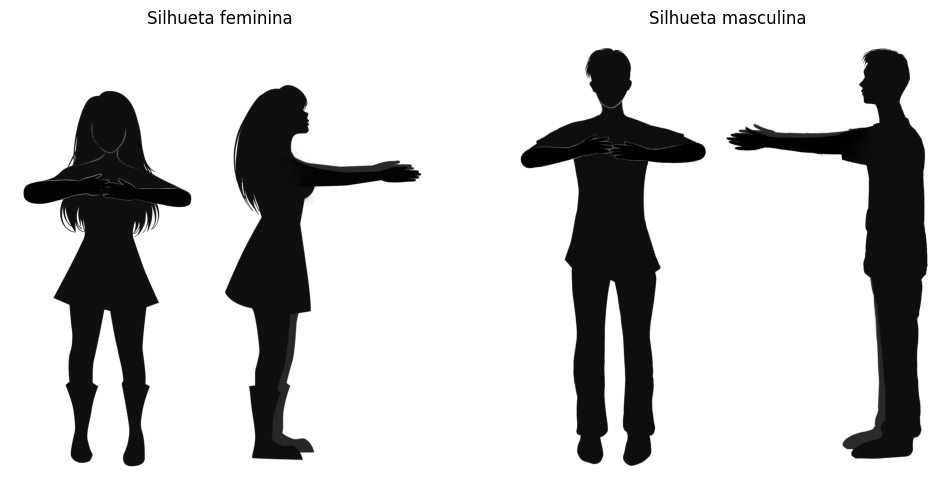

In [ ]:
# Imagens de silhuetas para exemplo de pose nas fotos
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_woman_path = '/content/silhueta_feminina.PNG'
img_man_path = '/content/silhueta_masculina.PNG'

img_woman = mpimg.imread(img_woman_path)
img_man = mpimg.imread(img_man_path)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_woman)
plt.axis('off')
plt.title('Silhueta feminina')

plt.subplot(1, 2, 2)
plt.imshow(img_man)
plt.axis('off')
plt.title('Silhueta masculina')

plt.show()

Dicas para a pose de cada foto:

Para a imagem frontal:

- Ângulo reto (90º) entre a câmera e a pessoa;
- Braços levantados com as mãos unidas no centro do corpo (sem erguer os ombros);
- Foto frontal de corpo inteiro.


Para a imagem lateral:

- Ângulo reto (90º) entre a câmera e a pessoa;
- Braços levantados para frente (sem erquer os ombros);
- Braços abaixo da linha dos ombros;
- Foto lateral de corpo inteiro.

***Observação:*** *Ambas as imagens devem estar com a mesma distância entre a câmera e a pessoa.*

In [ ]:
# Baixa a biblioteca do Detectron2. É possível usar alguns métodos via "cmd"
!git clone https://github.com/facebookresearch/detectron2

fatal: destination path 'detectron2' already exists and is not an empty directory.


In [ ]:
# Instalação do Detectron2
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-skmpzbfz
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-skmpzbfz
  Resolved https://github.com/facebookresearch/detectron2.git to commit e70b9229d77aa39d85f8fa5266e6ea658e92eed3
  Preparing metadata (setup.py) ... done


In [ ]:
# Instalação do Densepose
!pip install git+https://github.com/facebookresearch/detectron2@main#subdirectory=projects/DensePose

  Cloning https://github.com/facebookresearch/detectron2 (to revision main) to /tmp/pip-req-build-8yxakkmd
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2 /tmp/pip-req-build-8yxakkmd
  Resolved https://github.com/facebookresearch/detectron2 to commit e70b9229d77aa39d85f8fa5266e6ea658e92eed3
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-install-fjmg6_18/detectron2_6ed7943d8601415491b2c81c8467d82e
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-fjmg6_18/detectron2_6ed7943d8601415491b2c81c8467d82e
  Resolved https://github.com/facebookresearch/detectron2.git to commit e70b9229d77aa39d85f8fa5266e6ea658e92eed3
  Preparing metadata (setup.py) ... done


In [ ]:
# Instalação do YOLOv8
!pip install ultralytics

In [ ]:
# Instalação do MediaPipe
!pip install mediapipe

## Verificando GPU e componentes físicos


In [ ]:
!nvidia-smi

Wed Feb  7 01:20:44 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0              28W /  70W |   2817MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Instalando as dependências

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.1 ; cuda:  cu121
detectron2: 0.6


In [ ]:
# COMMON LIBRARIES
import os
import cv2
import numpy as np
from typing import Any, ClassVar, Dict, List
import argparse
import glob
import logging
import pickle
import sys
import torch
import copy
import matplotlib
import random
import math

from matplotlib import pyplot as plt
from datetime import datetime
from google.colab.patches import cv2_imshow

# DATA SET PREPARATION AND LOADING
from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetCatalog, MetadataCatalog
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg

# VISUALIZATION
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode

# CONFIGURATION
from detectron2 import model_zoo
from detectron2.config import get_cfg

# EVALUATION
from detectron2.engine import DefaultPredictor

# TRAINING
from detectron2.engine import DefaultTrainer

# DENSEPONSE
import densepose

# DENSEPOSE LIBRARIES
from detectron2.config import get_cfg
from detectron2.structures.instances import Instances
from detectron2.engine.defaults import DefaultPredictor
from densepose import add_densepose_config
from densepose.vis.base import CompoundVisualizer,RectangleVisualizer
from densepose.vis.bounding_box import ScoredBoundingBoxVisualizer, BoundingBoxVisualizer
from densepose.vis.extractor import CompoundExtractor, create_extractor,extract_scores_from_instances,extract_boxes_xywh_from_instances , DensePoseOutputsExtractor
from densepose.vis.densepose_outputs_iuv import DensePoseOutputsVisualizer
from densepose.vis.densepose_outputs_iuv import DensePoseOutputsVisualizer
from densepose.data.dataset_mapper import DatasetMapper
from densepose.data.image_list_dataset import ImageListDataset
from densepose.structures.list import DensePoseList
from densepose.vis.densepose_results import (
    DensePoseResultsContourVisualizer,
    DensePoseResultsFineSegmentationVisualizer,
    DensePoseResultsUVisualizer,
    DensePoseResultsVVisualizer,
    DensePoseResultsVisualizer
)

# YOLOV8
from ultralytics import YOLO

# MEDIAPIPE
import mediapipe as mp

In [ ]:
%matplotlib inline

## Executando modelos de detecção e segmentação, pré-treinados

### Detectron2

In [ ]:
# Imagem frontal
img_front = cv2.imread("/content/drive/MyDrive/foto_frente.jpg") # Altere o caminho da imagem

# Imagem lateral
img_side = cv2.imread("/content/drive/MyDrive/foto_lado.jpg") # Altere o caminho da imagem

In [ ]:
def predict(img):  ## Predição do DensePose do Detectron2
    outputs = predictor(img)['instances']
    image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image = np.tile(image[:, :, np.newaxis], [1, 1, 3])
    data = extractor(outputs)
    image_vis = visualizer.visualize(image, data)
    return image_vis

def parse_iuv(result):
    i = result[0][0].labels.cpu().numpy().astype(float) # result[0][0] => pred_densepose
    uv = (result[0][0].uv.cpu().numpy() * 255.0).astype(float)
    iuv = np.stack((uv[1, :, :], uv[0, :, :], i))
    iuv = np.transpose(iuv, (1, 2, 0))
    return iuv

def parse_bbox(result):
    return result[1][0].cpu().numpy() ## result[1][0] => pred_boxes_XYXY


In [ ]:
cfg = get_cfg()
add_densepose_config(cfg)

cfg.merge_from_file("/content/detectron2/projects/DensePose/configs/densepose_rcnn_R_101_FPN_s1x.yaml")
cfg.MODEL.DEVICE = "cuda"
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5

cfg.MODEL.WEIGHTS = "https://dl.fbaipublicfiles.com/densepose/densepose_rcnn_R_101_FPN_s1x/165712084/model_final_c6ab63.pkl"

predictor = DefaultPredictor(cfg)

VISUALIZERS: ClassVar[Dict[str, object]] = {
    "dp_contour": DensePoseResultsContourVisualizer,
    "dp_segm": DensePoseResultsFineSegmentationVisualizer,
    "dp_u": DensePoseResultsUVisualizer,
    "dp_v": DensePoseResultsVVisualizer,
    "bbox": ScoredBoundingBoxVisualizer,
    "dp_out": DensePoseResultsVisualizer
}

vis_specs = ['dp_segm', 'bbox']
visualizers = []
extractors = []
for vis_spec in vis_specs:
    vis = VISUALIZERS[vis_spec]()
    visualizers.append(vis)
    extractor = create_extractor(vis)
    extractors.append(extractor)
visualizer = CompoundVisualizer(visualizers)
extractor = CompoundExtractor(extractors)

context = {
    "extractor": extractor,
    "visualizer": visualizer
}


visualizer = context["visualizer"]
extractor = context["extractor"]

In [ ]:
# Extraindo os dados da segmentação

def data_extract(img):
  outputs = predictor(img)['instances']
  data = extractor(outputs)
  return data

data = dict()
results = dict()
iuv = dict()
bbox = dict()


# Predição da parte frontal
data["front"] = data_extract(img_front)

# Predição da parte lateral
data["side"] = data_extract(img_side)

# Dados armazenados em 'extractors' para leitura
results["front"] = data["front"][0]
results["side"] = data["side"][0]

iuv["front"] = parse_iuv(results["front"])
iuv["side"] = parse_iuv(results["side"])

bbox["front"] = parse_bbox(results["front"])
bbox["side"] = parse_bbox(results["side"])

In [ ]:
# Pegando o ROI da pessoa segmentada
def img_roi(bbox, img):
  x_box, y_box, w_box, h_box = [int(v) for v in bbox]

  img_crop = img[y_box:y_box+h_box, x_box:x_box+w_box]
  return img_crop


img_crop = dict()

img_crop["front"] = img_roi(bbox["front"],img_front)
img_crop["side"] = img_roi(bbox["side"],img_side)


x_front, y_front, w_front ,h_front = [int(v) for v in bbox["front"]]
x_side, y_side, w_side, h_side = [int(v) for v in bbox["side"]]


### MediaPipe e YOLOv8

In [ ]:
def overlay(image, mask, color, alpha, resize=None):

    colored_mask = np.expand_dims(mask, 0).repeat(3, axis=0)
    colored_mask = np.moveaxis(colored_mask, 0, -1)
    masked = np.ma.MaskedArray(image, mask=colored_mask, fill_value=color)
    image_overlay = masked.filled()

    if resize is not None:
        image = cv2.resize(image.transpose(1, 2, 0), resize)
        image_overlay = cv2.resize(image_overlay.transpose(1, 2, 0), resize)

    image_combined = cv2.addWeighted(image, 1 - alpha, image_overlay, alpha, 0)

    return image_combined


## MEDIA PIPE SETUP
# Inicialização das classes de pose do Mediapipe
mp_pose = mp.solutions.pose

# Configuração da função 'Pose' para imagens - de forma independente para o processamento independente de imagens
pose_image = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)

## YOLOv8 SETUP
# Carregamento do modelo
model = YOLO('yolov8n-seg.pt')
class_names = model.names
print('Class Names: ', class_names)
colors = [[random.randint(0, 255) for _ in range(3)] for _ in class_names]


Class Names:  {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone

In [ ]:
def segmentation_points(img_crop,iuv):

  # Lê a imagem
  img = img_crop

  # Imagem 'shape'
  h, w, _ = img.shape


  # YOLOv8 resultados
  results = model.predict(img)

  for r in results:
      boxes = r.boxes  # Boxes object, para saídas bbox
      masks = r.masks  # Masks object, para segmentar máscaras de saída
      probs = r.probs  # Class probabilities, para classificar saídas


  if masks is not None:
      masks = masks.data.cpu()
      for seg, box in zip(masks.data.cpu().numpy(), boxes):

          seg = cv2.resize(seg, (w, h))
          img = overlay(img, seg, colors[int(box.cls)], 0.4)


  # MediaPipe resultado
  image_in_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  results = pose_image.process(image_in_RGB)

  #IUV Shape =
  h_iuv, w_iuv,_ = iuv.shape

  coordinates_points = dict()


  # COORDENADAS DOS PONTOS NA IMAGEM ORIGINAL
  coordinates_points["nose_x"] = int(results.pose_landmarks.landmark[0].x * w)
  coordinates_points["nose_y"] = int(results.pose_landmarks.landmark[0].y * h)

  coordinates_points["r_eye_x"] = int(results.pose_landmarks.landmark[2].x * w)
  coordinates_points["r_eye_y"] = int(results.pose_landmarks.landmark[2].y * h)
  coordinates_points["l_eye_x"] = int(results.pose_landmarks.landmark[5].x * w)
  coordinates_points["l_eye_y"] = int(results.pose_landmarks.landmark[5].y * h)

  coordinates_points["l_hip_x"] = int(results.pose_landmarks.landmark[23].x * w)
  coordinates_points["l_hip_y"] = int(results.pose_landmarks.landmark[23].y * h)
  coordinates_points["r_hip_x"] = int(results.pose_landmarks.landmark[24].x * w)
  coordinates_points["r_hip_y"] = int(results.pose_landmarks.landmark[24].y * h)

  print('Nose coordinates: (', coordinates_points["nose_x"],',',coordinates_points["nose_y"],')' )
  print('Left eye coordinates: (', coordinates_points["l_eye_x"],',',coordinates_points["l_eye_y"],')' )
  print('Right eye coordinates: (', coordinates_points["r_eye_x"],',',coordinates_points["r_eye_y"],')' )
  print('Left hip coordinates: (', coordinates_points["l_hip_x"],',',coordinates_points["l_hip_y"],')' )
  print('Right hip coordinates: (', coordinates_points["r_hip_x"],',',coordinates_points["r_hip_y"],')' )

  # Imagem com os pontos selecionados
  fig, ax = plt.subplots()
  ax.imshow(iuv[:, :, ::-1])
  ax.plot([coordinates_points["nose_x"],coordinates_points["l_eye_x"],coordinates_points["r_eye_x"], coordinates_points["l_hip_x"], coordinates_points["r_hip_x"]], [coordinates_points["nose_y"],coordinates_points["l_eye_y"],coordinates_points["r_eye_y"], coordinates_points["l_hip_y"], coordinates_points["r_hip_y"]], 'ro')
  plt.show()

  return coordinates_points


0: 640x320 1 person, 18.3ms
Speed: 2.9ms preprocess, 18.3ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 320)


Nose coordinates: ( 555 , 205 )
Left eye coordinates: ( 506 , 163 )
Right eye coordinates: ( 590 , 166 )
Left hip coordinates: ( 654 , 1119 )
Right hip coordinates: ( 428 , 1119 )


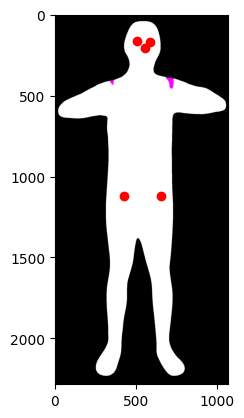


0: 640x320 1 person, 21.8ms
Speed: 8.4ms preprocess, 21.8ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 320)


Nose coordinates: ( 307 , 210 )
Left eye coordinates: ( 256 , 169 )
Right eye coordinates: ( 272 , 167 )
Left hip coordinates: ( 220 , 1083 )
Right hip coordinates: ( 229 , 1098 )


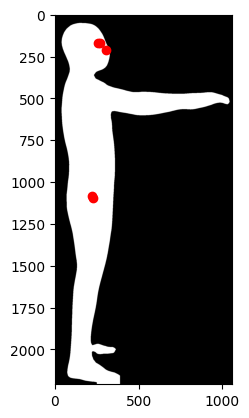

In [ ]:
body_points = dict()

body_points["front"] = segmentation_points(img_crop["front"],iuv["front"])
body_points["side"] = segmentation_points(img_crop["side"],iuv["side"])

### Informações da pessoa

In [ ]:
while True:
    gender = input("Insira o gênero, 'M' para masculino ou 'F' para feminino: ")

    if gender.upper() in ['M', 'F']:
        break
    else:
        print(f"\n'{gender}' não é válido. Digite 'M' ou 'F'.\n")

Insira o gênero, 'M' para masculino ou 'F' para feminino: m


In [ ]:
age = int(input("Insira a idade (em anos): "))

Insira a idade (em anos): 26


In [ ]:
measure_height = float(input("Insira a altura (em centímetros): "))

Insira a altura (em centímetros): 162.0


In [ ]:
weight = float(input("Insira o peso (em quilos): "))

Insira o peso (em quilos): 56.0


In [ ]:
while True:
    print("0 - Sedentário (pouco ou nenhum exercício)\n1 - Levemente ativo (exercício leve 1 a 3 dias por semana)\n2 - Moderadamente ativo (pratica esportes 3 a 5 dias por semana\n3 - Muito ativo (exercícios intensos de 5 a 6 dias por semana)\n4 - Extremamente ativo (exercícios intensos diariamente ou até 2 vezes por dia)")

    activity_factor = input("\nInsira o número do fator de atividade entre as opções: ")

    if str(activity_factor) in ["0", "1", "2", "3", "4"]:
        break
    else:
        print(f"\n'{activity_factor}' não é válido. Digite '0', '1', '2', '3' ou '4'.\n")

0 - Sedentário (pouco ou nenhum exercício)
1 - Levemente ativo (exercício leve 1 a 3 dias por semana)
2 - Moderadamente ativo (pratica esportes 3 a 5 dias por semana
3 - Muito ativo (exercícios intensos de 5 a 6 dias por semana)
4 - Extremamente ativo (exercícios intensos diariamente ou até 2 vezes por dia)

Insira o número do fator de atividade entre as opções: 1


In [ ]:
def find_chin(body_points):

  eye_y_max = max(body_points["l_eye_y"],body_points["r_eye_y"])

  if body_points["l_eye_y"] == eye_y_max:
    eye_x_max = body_points["l_eye_x"]
  else:
    eye_x_max = body_points["r_eye_x"]

  # Pontos dos olhos e do nariz
  p1 = (body_points["nose_x"], body_points["nose_y"])
  p2 = (eye_x_max,eye_y_max)

  # Distância entre os olhos e o nariz
  distance_eye_nose = np.linalg.norm(np.array(p1)-np.array(p2), ord=2)

  return int((body_points["nose_y"] + (distance_eye_nose * 2)))

In [ ]:
def neck_size(body_points, iuv):


  for key in body_points.keys():

    if key == 'front':

      line_neck = find_chin(body_points["front"]) + 5

      median_of_neck_pixels = np.where(iuv["front"][line_neck, :, :].mean(axis=1) > 0)
      neck_pixels_initial = max(median_of_neck_pixels).min()
      neck_pixels_final = max(median_of_neck_pixels).max()

      p1 = (neck_pixels_initial, line_neck)
      p2 = (neck_pixels_final, line_neck)

      # Plot frontal pescoço
      plt.imshow(iuv["front"])
      plt.scatter(p1[0], p1[1])
      plt.scatter(p2[0], p2[1])
      plt.show()

      line_size = np.linalg.norm(np.array(p1)-np.array(p2), ord=2)

      f_size = (measure_height * line_size)/(int(h_front)-10)


    elif key == 'side':

      line_neck = find_chin(body_points["side"]) + 5

      median_of_neck_pixels = np.where(iuv["side"][line_neck, :, :].mean(axis=1) > 0)
      neck_pixels_initial = max(median_of_neck_pixels).min()
      neck_pixels_final = max(median_of_neck_pixels).max()

      p1 = (neck_pixels_initial, line_neck)
      p2 = (neck_pixels_final, line_neck)

      # Plot lateral pescoço
      plt.imshow(iuv["side"])
      plt.scatter(p1[0], p1[1])
      plt.scatter(p2[0], p2[1])
      plt.show()

      line_size = np.linalg.norm(np.array(p1)-np.array(p2), ord=2)

      s_size = (measure_height * line_size)/(int(h_side)-10)

    else:
      return

  return f_size, s_size


In [ ]:
def waist_size(body_points, iuv):


  for key in body_points.keys():


    if key == 'front':

      # Pegando o meio da imagem (usado para pegar o tamanho da cintura)
      mid_point = [int(h_front/2),int(w_front/2)]

      line_waist = mid_point[0] - 40

      median_of_waist_pixels = np.where(iuv["front"][line_waist, :, :].mean(axis=1) > 0)
      waist_pixels_initial = max(median_of_waist_pixels).min()
      waist_pixels_final = max(median_of_waist_pixels).max()

      p1 = (waist_pixels_initial, line_waist)
      p2 = (waist_pixels_final, line_waist)

      # Plot frontal cintura
      plt.imshow(iuv["front"])
      plt.scatter(p1[0], p1[1])
      plt.scatter(p2[0], p2[1])
      plt.show()

      line_size = np.linalg.norm(np.array(p1)-np.array(p2), ord=2)

      f_size = (measure_height * line_size)/(int(h_front)-10)


    elif key == 'side':

      # Pegando o meio da imagem (usado para pegar o tamanho da cintura)
      mid_point = [int(h_side/2),int(w_side/2)]

      line_waist = mid_point[0] - 40

      median_of_waist_pixels = np.where(iuv["side"][line_waist, :, :].mean(axis=1) > 0)
      waist_pixels_initial = max(median_of_waist_pixels).min()
      waist_pixels_final = max(median_of_waist_pixels).max()

      p1 = (waist_pixels_initial, line_waist)
      p2 = (waist_pixels_final, line_waist)

      # Plot lateral cintura
      plt.imshow(iuv["side"])
      plt.scatter(p1[0], p1[1])
      plt.scatter(p2[0], p2[1])
      plt.show()

      line_size = np.linalg.norm(np.array(p1)-np.array(p2), ord=2)

      s_size = (measure_height * line_size)/(int(h_side)-10)

    else:
      return

  return f_size, s_size


In [ ]:
def hip_size(body_points,iuv):


  for key in body_points.keys():

    # Pegando o maior valor do quadril
    hip_max = max(body_points[key]["l_hip_y"],body_points[key]["r_hip_y"])

    if key == 'front':

      line_hip = hip_max

      median_of_hip_pixels = np.where(iuv["front"][line_hip, :, :].mean(axis=1) > 0)
      hip_pixels_initial = max(median_of_hip_pixels).min()
      hip_pixels_final = max(median_of_hip_pixels).max()

      p1 = (hip_pixels_initial, line_hip)
      p2 = (hip_pixels_final, line_hip)

      # Plot frontal quadril
      plt.imshow(iuv["front"])
      plt.scatter(p1[0], p1[1])
      plt.scatter(p2[0], p2[1])
      plt.show()

      line_size = np.linalg.norm(np.array(p1)-np.array(p2), ord=2)

      f_size = (measure_height * line_size)/(int(h_front)-10)


    elif key == 'side':

      line_hip = hip_max

      median_of_hip_pixels = np.where(iuv["side"][line_hip, :, :].mean(axis=1) > 0)
      hip_pixels_initial = max(median_of_hip_pixels).min()
      hip_pixels_final = max(median_of_hip_pixels).max()

      p1 = (hip_pixels_initial, line_hip)
      p2 = (hip_pixels_final, line_hip)

      # Plot lateral quadril
      plt.imshow(iuv["side"])
      plt.scatter(p1[0], p1[1])
      plt.scatter(p2[0], p2[1])
      plt.show()

      line_size = np.linalg.norm(np.array(p1)-np.array(p2), ord=2)

      s_size = (measure_height * line_size)/(int(h_side)-10)

    else:
      return

  return f_size, s_size


### Elipsoide das medidas

In [ ]:
def calc_ellipsoid(a,b):
  a = int(a)/2 # Tamanho da parte frontal
  b = int(b)/2 # Tamnho da parte lateral

  size_elipsoide = math.pi*(3*(a + b) - math.sqrt((3*a+b)*(a+3*b)))

  return size_elipsoide  # Fórmula do perímetro de uma elípse

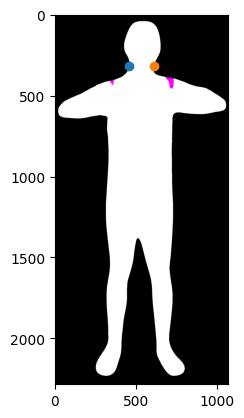

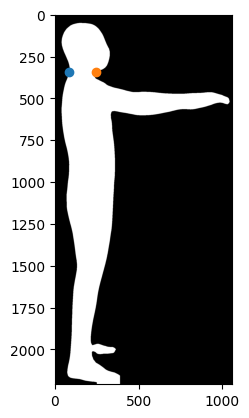

In [ ]:
# Imagens das marcações do pescoço
f_neck_size, s_neck_size = neck_size(body_points, iuv)

neck_measure = calc_ellipsoid(f_neck_size,s_neck_size)

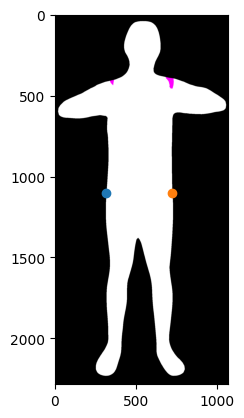

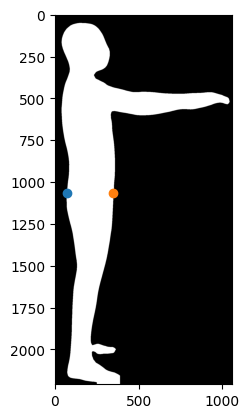

In [ ]:
# Imagens das marcações da cintura
f_waist_size, s_waist_size = waist_size(body_points, iuv)

waist_measure = calc_ellipsoid(f_waist_size,s_waist_size)

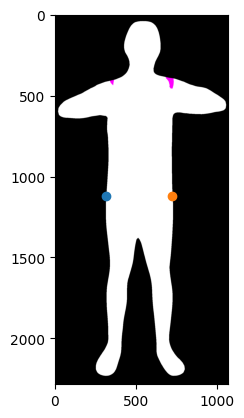

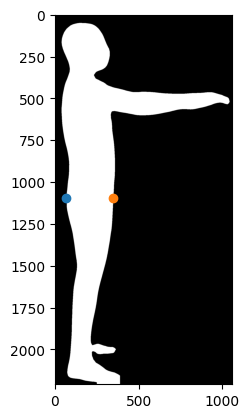

In [ ]:
# Imagens das marcações do quadril
f_hip_size, s_hip_size = hip_size(body_points, iuv)

hip_measure = calc_ellipsoid(f_hip_size,s_hip_size)

In [ ]:
print(f"Circunferência pesoço: {round(neck_measure, 1)} cm\n")
print(f"Circunferência cintura: {round(waist_measure, 1)} cm\n")
print(f"Circunferência quadril: {round(hip_measure, 1)} cm\n")

Circunferência pesoço: 33.0 cm

Circunferência cintura: 75.9 cm

Circunferência quadril: 75.9 cm



## Calculando a composição corporal


In [ ]:
def calc_bfp(gender, measure_height, neck_measure, waist_measure, hip_measure):

    '''
        Informa a Taxa de Gordura Corporal (TGC, sigla em inglês BFP)
    '''

    if (gender.upper() == "F"):
        gcm = (495 / (1.296 - 0.350 * math.log10(hip_measure + waist_measure - neck_measure) + 0.221 * \
                      math.log10(measure_height))) - 450
    else:
        gcm = (495 / (1.033 - 0.191 * math.log10(waist_measure - neck_measure) + 0.155 * \
                      math.log10(measure_height))) - 450

    return gcm


def calc_bmi(weight, measure_height):

    '''
        Informa o Índice de Massa Corporal (IMC, sigla em inglês BMI)
    '''

    bmi = ((weight) / ((measure_height / 100) ** 2))

    return bmi


def calc_body_composition(result_gcm, weight):

    fat_mass = (result_gcm / 100) * weight

    lean_mass = weight - fat_mass

    perc_fat_mass = (fat_mass * 100) / (fat_mass + lean_mass)

    perc_lean_mass = (lean_mass * 100) / (fat_mass + lean_mass)

    return fat_mass, lean_mass, perc_fat_mass, perc_lean_mass


def calc_bmr(weight, measure_height, age):

    '''
        Equação de Harris-Benedict adaptada

        Informa a Taxa de Metabolismo Basal (TMB, sigla em inglês BMR)
    '''

    if (gender.upper() == "F"):
        bmr = 447.593 + (9.247 * weight) + (3.098 * measure_height) - (4.330 * age)
    else:
        bmr = 88.362 + (13.397 * weight) + (4.799 * measure_height) - (5.677 * age)

    return bmr


def calc_daily_calorie(result_bmr, activity_factor):

    '''
        Informa o Gasto Total Diário com Energia (GTDE, sigla em inglês TDEE)

        Se você é sedentário (pouco ou nenhum exercício), multiplique a TMB por 1,2.
        Se você é levemente ativo (exercício leve 1 a 3 dias por semana), multiplique a TMB por 1,375.
        Se você é moderadamente ativo (pratica esportes 3 a 5 dias por semana), multiplique a TMB por 1,55.
        Se você é muito ativo (exercícios intensos de 5 a 6 dias por semana), multiplique a TMB por 1,725.
        Se você é extremamente ativo (exercícios intensos diariamente ou até 2 vezes por dia), multiplique a TMB por 1,9.
    '''

    if(activity_factor == "0"):
        daily_calorie = result_bmr * 1.2
    elif(activity_factor == "1"):
        daily_calorie = result_bmr * 1.375
    elif(activity_factor == "2"):
        daily_calorie = result_bmr * 1.55
    elif(activity_factor == "3"):
        daily_calorie = result_bmr * 1.725
    else:
        daily_calorie = result_bmr * 1.9

    return daily_calorie


def status_bfp(result_bfp, gender, age):

    '''
        Status TGC:
          Mulher:
            - Abaixo de 10.0 - 'Abaixo do essencial'
            - Entre 10.0 e 13.9 - 'Essencial'
            - Entre 14.0 e 20.9 - 'Atleta'
            - Entre 21.0 e 24.9 - 'Praticante de atividade física'
            - Entre 25.0 e 31.9 - 'Aceitável'
            - De 32.0 ou mais - 'Obesidade'

          Homem:
            - Abaixo de 2.0 - 'Abaixo do essencial'
            - Entre 2.0 e 5.9 - 'Essencial'
            - Entre 6.0 e 13.9 - 'Atleta'
            - Entre 14.0 e 17.9 - 'Praticante de atividade física'
            - Entre 18.0 e 24.9 - 'Aceitável'
            - De 25.0 ou mais - 'Obesidade'
    '''

    if (gender.upper() == "F"):
      if(result_bfp <= 9.9):
        status_bfp = "Abaixo do essencial"
      elif(result_bfp <= 13.9):
        status_bfp = "Essencial"
      elif(result_bfp <= 20.9):
        status_bfp = "Atleta"
      elif(result_bfp <= 24.9):
        status_bfp = "Praticante de atividade física"
      elif(result_bfp <= 31.9):
        status_bfp = "Aceitável"
      else:
        status_bfp = "Obesidade"
    else:
      if(result_bfp <= 1.9):
        status_bfp = "Abaixo do essencial"
      elif(result_bfp <= 5.9):
        status_bfp = "Essencial"
      elif(result_bfp <= 13.9):
        status_bfp = "Atleta"
      elif(result_bfp <= 17.9):
        status_bfp = "Praticante de atividade física"
      elif(result_bfp <= 24.9):
        status_bfp = "Aceitável"
      else:
        status_bfp = "Obesidade"

    return status_bfp


def status_bmi(result_bmi):
    '''
        Status IMC:
          - Abaixo de 17.00 - 'Muito abaixo do peso'
          - Entre 17.00 e 18.49 - 'Abaixo do peso'
          - Entre 18.50 até 24.99 - 'Peso normal'
          - Entre 25.00 até 29.99 - 'Sobrepeso'
          - Entre 30.00 até 34.99 - 'Obesidade I (moderada)'
          - Entre 35.00 até 39.99 - 'Obesidade II (severa)'
          - De 40.00 ou mais - 'Obesidade III (mórbida)'
    '''

    if(result_bmi < 17.00):
        status_bmi = "Muito abaixo do peso"
    elif(result_bmi <= 18.49):
        status_bmi = "Abaixo do peso"
    elif(result_bmi <= 24.99):
        status_bmi = "Peso normal"
    elif(result_bmi <= 29.99):
        status_bmi = "Acima do peso"
    elif(result_bmi <= 34.99):
        status_bmi = "Obesage I"
    elif(result_bmi <= 39.99):
        status_bmi = "Obesage II (severa)"
    else:
        status_bmi = "Obesage III (mórbida)"

    return status_bmi

### Resultados

In [ ]:
result_bfp = calc_bfp(gender, measure_height, neck_measure, waist_measure, hip_measure)

result_bmi = calc_bmi(weight, measure_height)

fat_mass, lean_mass, perc_fat_mass, perc_lean_mass = calc_body_composition(result_bfp, weight)

result_bmr = calc_bmr(weight, measure_height, age)

result_daily_calorie = calc_daily_calorie(result_bmr, activity_factor)

bfp_status = status_bfp(result_bfp, gender, age)

bmi_status = status_bmi(result_bmi)

In [ ]:
print(f"Taxa de Gordura Corporal (TGC): {round(result_bfp, 2)}%\n")

print(f"Status TGC: {bfp_status}\n")

print(f"Massa gorda: {round(fat_mass, 2)} kg ({round(perc_fat_mass, 2)}%)\n")

print(f"Massa magra: {round(lean_mass, 2)} kg ({round(perc_lean_mass, 2)}%)\n")

print(f"Índice de Massa Corporal (IMC): {round(result_bmi, 2)} kg/m^2\n")

print(f"Status IMC: {bmi_status}\n")

print(f"Taxa de Metabolismo Basal (TMB): {round(result_bmr, 0)} k/cal\n")

print(f"Gasto Total Diário com Energia (GTDE): {round(result_daily_calorie, 0)} k/cal\n")

Taxa de Gordura Corporal (TGC): 15.38%

Status TGC: Praticante de atividade física

Massa gorda: 8.61 kg (15.38%)

Massa magra: 47.39 kg (84.62%)

Índice de Massa Corporal (IMC): 21.34 kg/m^2

Status IMC: Peso normal

Taxa de Metabolismo Basal (TMB): 1468.0 k/cal

Gasto Total Diário com Energia (GTDE): 2019.0 k/cal



## Informações adicionais

**Taxa de Gordura Corporal (TGC)**: Toda a gordura do corpo em porcentagem.

<br>

**Status TGC**:

Mulher:
- Abaixo de 10.0 - 'Abaixo do essencial'
- Entre 10.0 e 13.9 - 'Essencial'
- Entre 14.0 e 20.9 - 'Atleta'
- Entre 21.0 e 24.9 - 'Praticante de atividade física'
- Entre 25.0 e 31.9 - 'Aceitável'
- De 32.0 ou mais - 'Obesidade'

Homem:
- Abaixo de 2.0 - 'Abaixo do essencial'
- Entre 2.0 e 5.9 - 'Essencial'
- Entre 6.0 e 13.9 - 'Atleta'
- Entre 14.0 e 17.9 - 'Praticante de atividade física'
- Entre 18.0 e 24.9 - 'Aceitável'
- De 25.0 ou mais - 'Obesidade'


<br>

**Massa gorda**: Toda a gordura do corpo.

<br>

**Massa magra**: Peso do corpo livre de gordura, como os músculos, massa óssea, órgãos, pele e articulações.

<br>

**Índice de Massa Corporal (IMC)**: Cálculo que avalia se uma pessoa está dentro do peso que é considerado ideal para sua altura.

<br>

**Status IMC**:

- Abaixo de 17.00 - 'Muito abaixo do peso'
- Entre 17.00 e 18.49 - 'Abaixo do peso'
- Entre 18.50 até 24.99 - 'Peso normal'
- Entre 25.00 até 29.99 - 'Sobrepeso'
- Entre 30.00 até 34.99 - 'Obesidade I (moderada)'
- Entre 35.00 até 39.99 - 'Obesidade II (severa)'
- De 40.00 ou mais - 'Obesidade III (mórbida)'

<br>

**Taxa de Metabolismo Basal (TMB)**: Energia mínima apenas para manter as funções vitais do corpo em repouso.

<br>

**Gasto Total Diário com Energia (GTDE)**: Quantidade total de energia que o corpo gasta diariamente, incluindo a TMB, e a energia gasta em atividades feitas ao longo do dia, como limpar a casa, trabalhar ou praticar atividades físicas.